In [74]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Polynomial Interpolation

In this lab, I studied the different forms of polynomial interpolation stating with creating my own Newton's method. I also develop the algorithm for 2D Lagrange Interpolation. Finally, in the third part of this project I demonstrate the difference in selecting nodes and the property that some sets of node are poor interpolating nodes while others are much better for certain functions

## Newton Interpolation

#### Creating the Newton Polynomial

Part one consisted of creating Newton's method for polynomial interpolation in the C++ class func_Newtonform.cpp. Newton's interpolating polynomial is defined as $$p_n(x) = a_0 + a_1(x-x_0) + a_2(x - x_0)(x - x_1) + ... + a_n(x - x_0)(x- x_1) ... (x - x_{n-1})$$
To define $a_0, a_1, ... , a_{n-1}$ I used the formula $$a_{n+1} = \frac{y_{n+1} - p_n(x_{n+1})} {(x_{n+1} - x_0)(x_{n+1} - x_1) ... (x_{n+1} - x_{n-1})}$$

In that class I implemented all the required aspects of creating Newton's interpolating polynomial in the methods
```cpp
double Newton_basis(Matrix& xnodes, int n, double x)

double Newton_nestedform(Matrix& a, Matrix& xnodes, double x)

Matrix Newton_coefficients(Matrix& xnodes, Matrix& ynodes)
```
These methods created Newton's interpolating polynomial with the nodes $(x_i, y_i) \in$ xnodes, ynodes; $i = 0, ..., n$ The method *Newton_basis* creates the Newton basis for $$\emptyset_{n+1}(x) = (x - x_0)(x- x_1) ... (x - x_n)$$ 

The next method *Newton_nestedform* calculates the value of $$p_n(x) = a_0 + a_1(x-x_0) + a_2(x - x_0)(x - x_1) + ... + a_n(x - x_0)(x- x_1) ... (x - x_{n-1})$$ with a given $x$ values and is used in deriving the $a_{n+1}$ node.

The final method *Newton_coefficients* creates the interpolating polynomials weights with the given nodes $(x_0, y_0), (x_1, y_1) , ... $. This function returns the weights in a matrix to be used to approximate a function.

#### Testing the Newton Polynomial

To test my algorithm, I created a C++ class test_Newtonform.cpp. This class had the test function be $$f(x) = 3.1x^4 + 2.3x^3 - 6.6x^2 + 8.7x + 7.9$$ The nodes to use in the interpolation were also given as $x_i = -2, -1, 0, 1, 2$. With these five(n+1) nodes I created a degree 4(n) polynomial to approximate the function over the interval $[-3, 3]$. I used 201 linearly spaced points to compare the graphs. I expect that the interpolation will match exactly(within machine precision) to the function given because of the **Theorem on Existence of Polynomial Interpolation**: *If points $x_0,  x_1, ..., x_n$ are distinct there is a unique polynomial p of degree n such that $p(x_i) = y_i$ for $0 \leq i \leq n$

In [75]:
x = loadtxt('x.txt')
f = loadtxt('f.txt')
p = loadtxt('p.txt')

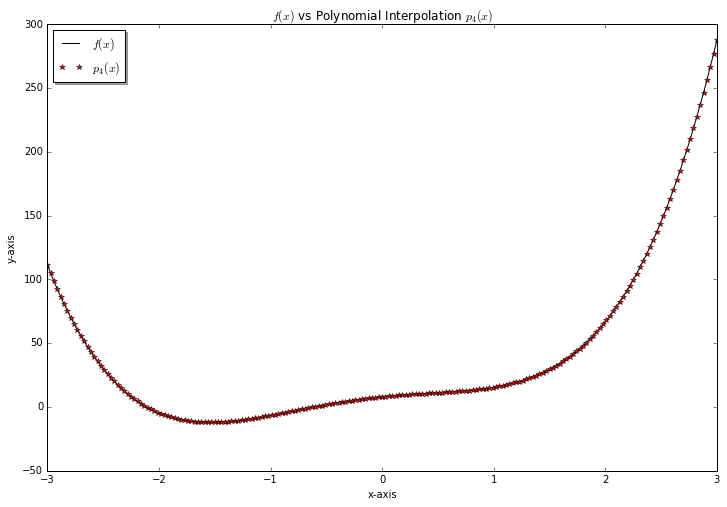

In [76]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(x,f,"k-", label="$f(x)$")
ax.plot(x,p,"r*", label="$p_4(x)$")
ax.set_title("$f(x)$ vs Polynomial Interpolation $p_4(x)$")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")

legendPlot1 = ax.legend(loc="upper left", shadow=True)

plt.show()

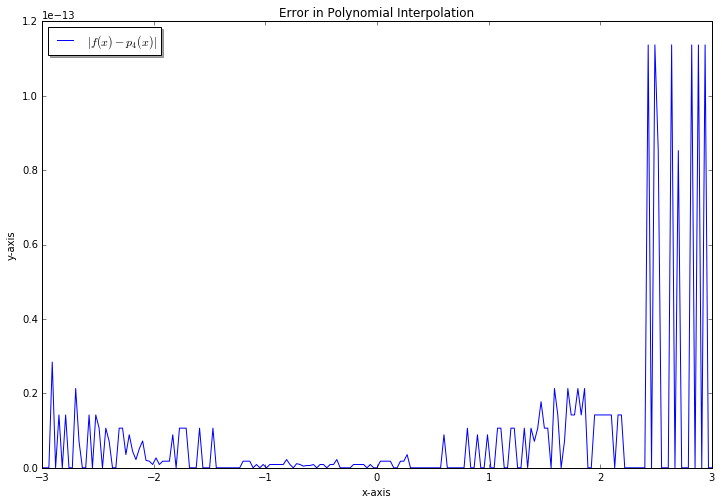

In [77]:
eOfp = abs(f-p)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(x,eOfp,"b-", label="$|f(x) - p_4(x)|$")
ax.set_title("Error in Polynomial Interpolation")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")

legendPlot1 = ax.legend(loc="upper left", shadow=True)

plt.show()

The graphs show very will that my assumption was correct. The interpolating polynomial has a remarkable accuracy when it comes to predicting the value of $f(x)$. The highest error is just below $1.2e^{-13}$ I attribute this error to the inaccurate nature of double precision machine floating point numbers.

## Multi-dimensional Interpolation

The second part of Project 3 was creating a two-dimensional interpolating algorithm for interpolating functions with multiple variables. To interpolate a two-dimensional function I define the points $\{(x_i, y_j)\}$ as the points $\{x_i\}^m_{i=0}$ and $\{y_j\}^m_{j=0}$ on the plane $(m+1)(n+1)$. To construct the two-dimensional Lagrange basis I had to create a Lagrange basis for each $x$ and $y$. $$\emptyset_i(x) = \prod_{k=0,k \neq i}^{m} \frac{x - x_k}{x_i - x_k}, i = 0, 1, ... m $$ and $$ \emptyset_i(y) = \prod_{k=0,k \neq i}^{n} \frac{y - y_k}{y_j - y_k}, j = 0, 1, ... n$$ From these two Lagrange basis functions I construct the two-dimensional Lagrange basis function as $l_{i,j}(x,y) = \emptyset_i(x) \emptyset _j(y)$. With our two-dimensional Lagrange basis complete I can interpolate any function $f(x,y)$ wiht the nodes $\{(x_i, y_j)\}$ at any point $(a,b)$ as the polynomial $$p(a,b) = \sum_{i=0}^m \sum_{j=0}^n f(x_i,y_j)l_{i,j}(a,b)$$ With this finaly polynomial $p(a,b)$ created mathematically, I could write a C++ program **Lagrange2D.cpp** to calculate the value. In **Lagrange2D.cpp** I had the method signature
```cpp
double Lagrange2D(Matrix& x, Matrix& y, Matrix& f, double a, double b);
```


##### Testing the Two-Dimensional Interpolating Polynomial

For Project 3, a **test_Lagrange2D.cpp** was given for testing porpuses. Here are the results.

In [78]:
a = loadtxt('a.txt')
b = loadtxt('b.txt')
f = loadtxt('ftrue.txt')
p10 = loadtxt('p10.txt')
p20 = loadtxt('p20.txt')

Plot $f(x,y)$ frist

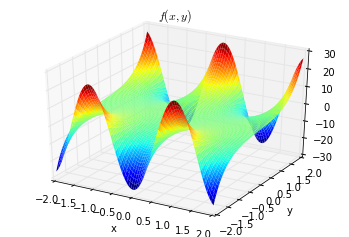

In [79]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, f, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$f(x,y)$')

Now plot both $p_10(x,y)$ and $p_20(x,y)$

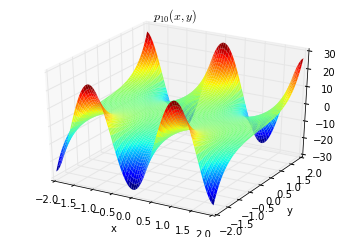

In [80]:
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, p10, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$p_{10}(x,y)$')

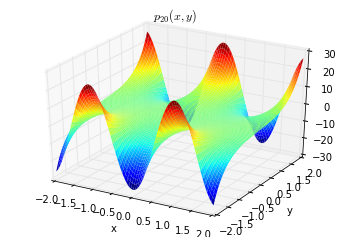

In [81]:
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, p20, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$p_{20}(x,y)$')

Now plot the error in $p_10(x,y)$

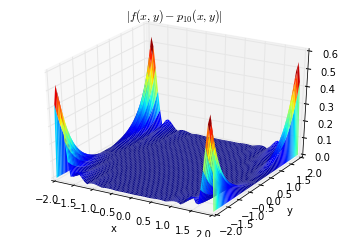

In [82]:
e10 = abs(f-p10)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, e10, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - p_{10}(x,y)|$')

Now plot the error in $p_20(x,y)$

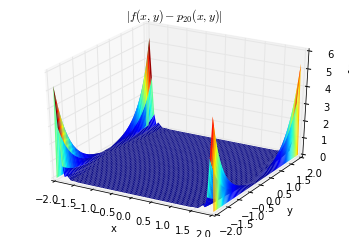

In [83]:
e20 = abs(f-p20)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, e20, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - p_{20}(x,y)|$')

*Note: In this graph, the z-axis is not displaying properly. When run with the **plot_Lagrange2D.py** the graph shows the correct z-axis. There error is even more noticeable when the error norm for this graph is seen*

Now check the max error for each, and compare against a known tolerance for these functions over these intervals with this many nodes

In [84]:
e10tol = 0.058
e20tol = 3.7e-8
e10norm = sqrt(sum(sum(e10**2))/size(e10))
e20norm = sqrt(sum(sum(e20**2))/size(e20))
if (e10norm > e10tol):
    print ('p10 faulure!  ||e10|| = ', e10norm, ' is above tolerance of ',e10tol)
else:
    print ('p10 success!  ||e10|| = ', e10norm, ' is below tolerance of ',e10tol)
if (e20norm > e20tol):
    print ('p20 failure!  ||e20|| = ', e20norm, ' is above tolerance of ',e20tol)
else:
    print ('p20 success!  ||e20|| = ', e20norm, ' is below tolerance of ',e20tol)

p10 success!  ||e10|| =  0.0575277609593  is below tolerance of  0.058
p20 success!  ||e20|| =  3.69239841116e-08  is below tolerance of  3.7e-08


## The Importance of Nodes

In the third and final portion of Project 3, I display the reason behind multiple methods when choosing interpolating points. Let's consider the function $$f(x,y) = \frac{1}{1+ x^2+ y^2}$$ in the rectangle $(x,y) \in [-4,4] \times [-4,4]$. I created two C++ programs to demonstrate how the accuracy of a interpolating polynomial can change based on the nodes given. For each C++ file, **Runge_uniform.cppp** and **Runge_Chebyshev.cpp** I performed the following procedure in their respective *main()* methods.
>(a) Use n = m = 6.
>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Create a set of $(m + 1)$ evenly-spaced nodes, x, over the interval $[−4, 4]$.
>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Create a set of $(n + 1)$ evenly-spaced nodes, y, over the interval $[−4, 4]$.
>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Create a matrix, $f \in (m+1)×(n+1)$ that contains the function values $f(x_i, y_j )$.
>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Create an array of 201 evenly-spaced evaluation points, a, over the interval $[−4, 4]$.
>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Create an array of 101 evenly-spaced evaluation points, b, over the interval $[−4, 4]$.
>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Use your Lagrange2D() function to evaluate the polynomial interpolant $p(a_i, b_j )$ at the 201 × 101 evaluation points, storing the result in a matrix $p6 \in 201×101$.
>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Output p6 to disk to a file named p6 uni.txt using the Matrix::Write routine.
>
>(b) Repeat the above process for m = n = 24, filling the output file p24 uni.txt.
>
>(c) Fill a matrix $runge \in 201×101$ with the correct values of $f(a_i, bj)$, and output this to a file named Runge.txt.

To determine the nodes for **Runge_Chebyshev.cpp** I used the formula $$x_i = L \cos \frac{(2i + 1) \pi}{2m + 2} , i = 0, 1, ..., m$$ with $L$ equal to $[-L,L]$


##### Testing the Diffrence in Interpolating Nodes

In [86]:
a = loadtxt('avals.txt')
b = loadtxt('bvals.txt')
runge = loadtxt('Runge.txt')
p6 = loadtxt('p6_uni.txt')
p24 = loadtxt('p24_uni.txt')
p6Cheb = loadtxt('p6_Cheb.txt')
p24Cheb = loadtxt('p24_Cheb.txt')

First I will exam $f(x,y)$

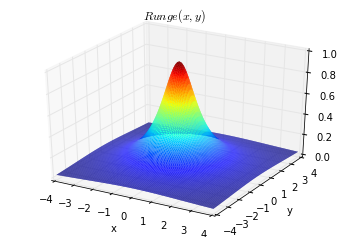

In [87]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, runge, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$Runge(x,y)$')

The first graph it the actual graph of the function $$f(x,y) = \frac{1}{1 + x^2 + y^2}$$ over the grid $(x, y) \in [-4,4] \times [-4,4]$ This graph was created by finding $f(a_i, b_j)$ in $a$ and $b$. Both $a$ and $b$ are vectors of 201 and 101 equally spaced points over $[-4,4]$ respectfully

Next will be $p_6(x,y)$ and $p_{24}(x,y)$

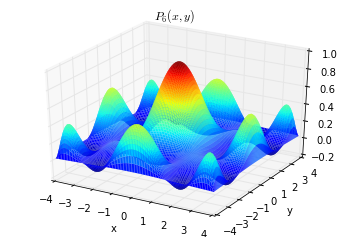

In [88]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, p6, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$P_6(x,y)$')

This next graph is created by the 2D interpolating function $p_6(x,y)$. This function used 7 interpolating points uniformly spread across the plane to create the interpolating polynomial and graphs that polynomial over the grid $(x, y) \in [-4,4] \times [-4,4]$

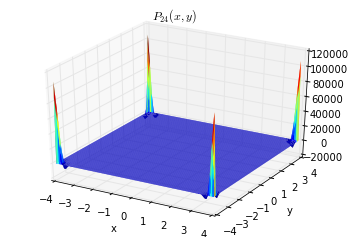

In [89]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, p24, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$P_{24}(x,y)$')

Our third graph uses the same process above but with 25 interpolating points uniformly spread over the grid $(x, y) \in [-4,4] \times [-4,4]$. This technique creates the least accurate graph because of the huge oscillation at the end points and the fact that this function is not easily interpolated using uniform points.

Next I have the graphs that implemented Chebyshev's points $PCheb_6(x,y)$ and $PCheb_{24}(x,y)$

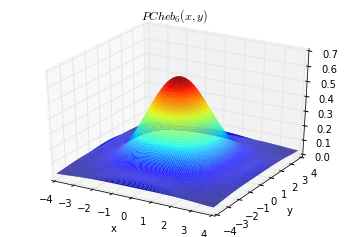

In [90]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, p6Cheb, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$PCheb_6(x,y)$')

The fourth graph is when I start using the Chebyshev points. These points help better interpolate functions that are hard using uniform points. Immediately you can see the difference. Of the other two graphs, this one looks the most like our Runge graph. It however still is not as good because the peak of this graph is only around 0.6 so you can tell that there is some error. This graph was created with 7 interpolating points created with the function $$x_i = L\cos\frac{(2i +1)\pi}{2m+2}$$ where $L = [-L, L]$ and $i = 0, ..., m$. This maps the interpolating point around a circle.

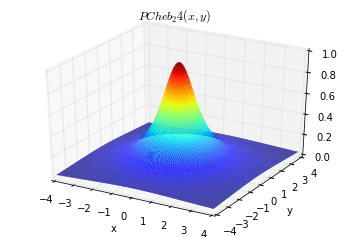

In [91]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, p24Cheb, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$PCheb_24(x,y)$')

The final graph is the 25 point Chebyshev interpolating polynomial. This one is the most accurate with the graph being very visually similar to the original function.

###### Error Graphs

Errors for $p_6(x,y)$ and $p_{24}(x,y)$ first.

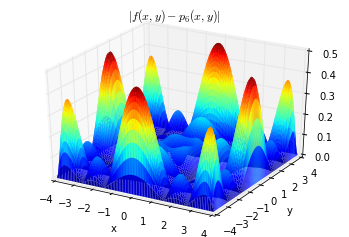

In [92]:
e6 = abs(runge-p6)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, e6, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - p_6(x,y)|$')

In this graph you can see the center, where $p_6(x,y)$ was somewhat accurate has only some slight error. However, the error has huge peaks where $p_6(x,y)$ oscillates and where $f(x,y)$ does not.

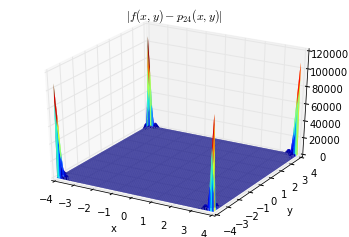

In [93]:
e24 = abs(runge-p24)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, e24, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - p_{24}(x,y)|$')

Not much changes from the $p_{24}(x,y)$ graph and its error graph. They are both still huge at the corners of the grid.

Now for the $PCheb_6(x,y)$ and $PCheb_{24}(x,y)$

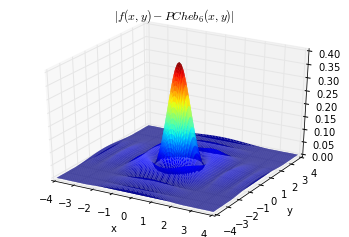

In [94]:
e6Cheb = abs(runge-p6Cheb)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, e6Cheb, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - PCheb_6(x,y)|$')

Once we analyze the error for the Chebyshev interpolating polynomial we can see how much better the interpolating polynomial fits the graph. The only large error here is where the cone peaks on $f(x,y)$ and that error rapidly decreases as $x$ and $y$ move away from $(0,0)$

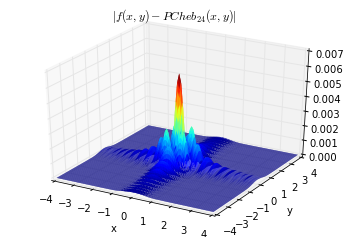

In [95]:
e24Cheb = abs(runge-p24Cheb)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, e24Cheb, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - PCheb_{24}(x,y)|$')

Finally, the error for the 25 point Chebyshev interpolating polynomial. The error in this polynomial is very small considering the other graphs. This graph maxes out around 0.006 at its highest point and decreases very quickly.

In [96]:
e6norm = sqrt(sum(sum(e6**2))/size(e6))
e24norm = sqrt(sum(sum(e24**2))/size(e24))
eCheb6norm = sqrt(sum(sum(e6Cheb**2))/size(e6Cheb))
eCheb24norm = sqrt(sum(sum(e24Cheb**2))/size(e24Cheb))

print ('||e6|| = ', e6norm)

print ('||e24|| = ', e24norm)

print ('||e6Cheb|| = ', eCheb6norm)

print ('||eCheb24|| = ', eCheb24norm)

||e6|| =  0.141951275763
||e24|| =  3340.29450949
||e6Cheb|| =  0.0440913843674
||eCheb24|| =  0.000403442073422


From the error norms, I can rank the different techniques used. To begin with, the interpolating polynomial created from 25 Chebyshev points creates the most accurate graph followed by the polynomial with 7 Chebyshev points. As expected from the graphs, the uniformly chosen points for the interpolating polynomials come in last with the 7 uniform points oscillating but still having a sub .2 error. Finally, the 25 uniform points comes in dead last with a huge error associated with its interpolating polynomial